In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [40]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [41]:
data.corr(numeric_only=True) #corrolation between numeric columns

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [42]:
data['Date'] = pd.to_datetime(data['Date']) #converting 'Date' column type from str to time&date
data.set_index('Date', inplace=True) #The set_index() method allows one or more column values become the row index.

In [43]:
data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [44]:
data = data.dropna()
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [45]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


<Axes: xlabel='Date'>

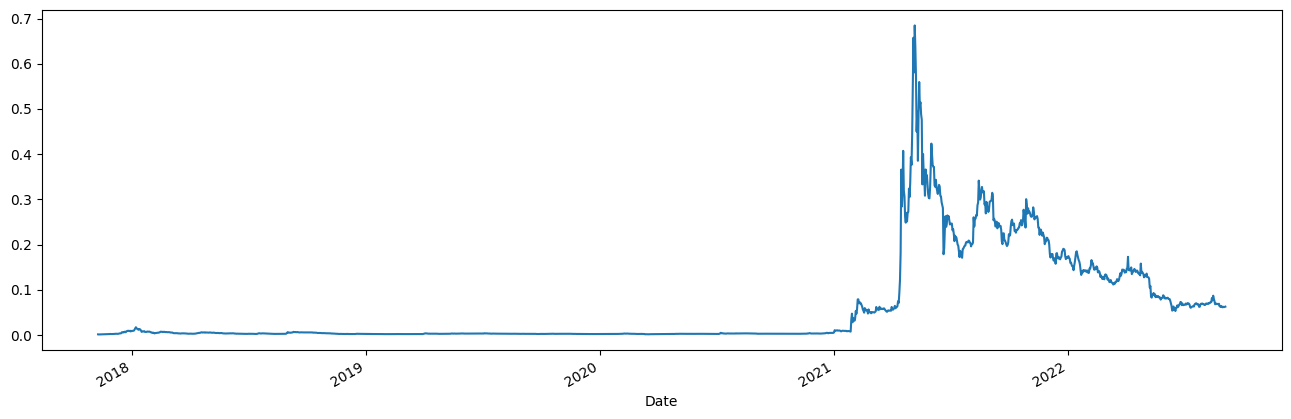

In [46]:
data['Close'].plot(figsize=(16,5))

<Axes: xlabel='Date'>

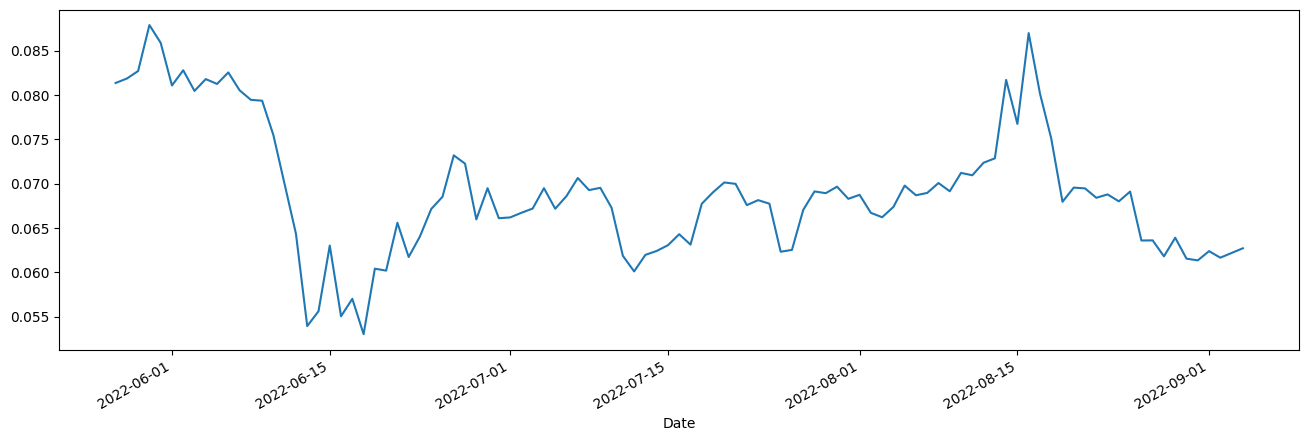

In [47]:
data['Close'].tail(100).plot(figsize=(16,5))

In [48]:
DOGE_Coin_Data = data.tail(100)
# 80% of data becomes traning set and the remaining become test set
train = DOGE_Coin_Data[:80] 
test = DOGE_Coin_Data[80:]
print(train.shape, test.shape)

(80, 6) (20, 6)


In [49]:
#finding the best parameter numbers
auto_arima(train['Close'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=-675.032, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-551.850, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-612.053, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=-197.199, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=-672.559, Time=0.12 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=-596.215, Time=0.24 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=-673.536, Time=0.21 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=-657.241, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=-677.693, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=-679.981, Time=0.04 sec
 ARIMA(1,0,2)(1,0,0)[7] intercept   : AIC=-602.449, Time=0.18 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : AIC=-679.488, Time=0.12 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=-678.896, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : 

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

In [53]:
model = SARIMAX(endog=train["Close"],
                #exog=train.drop(["Close", "Adj Close"], axis=1),
                order=(1,0,0),
                seasonal_order=(0,0,0,7))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.26042D+00    |proj g|=  1.25608D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     18      1     0     0   1.573D-04  -4.260D+00
  F =  -4.2604214329457974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [54]:
predictions = results.predict(start=len(train),
                              end=len(DOGE_Coin_Data) - 1)
predictions

2022-08-15    0.081602
2022-08-16    0.081517
2022-08-17    0.081433
2022-08-18    0.081348
2022-08-19    0.081263
2022-08-20    0.081179
2022-08-21    0.081095
2022-08-22    0.081010
2022-08-23    0.080926
2022-08-24    0.080842
2022-08-25    0.080758
2022-08-26    0.080674
2022-08-27    0.080590
2022-08-28    0.080507
2022-08-29    0.080423
2022-08-30    0.080339
2022-08-31    0.080256
2022-09-01    0.080172
2022-09-02    0.080089
2022-09-03    0.080006
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

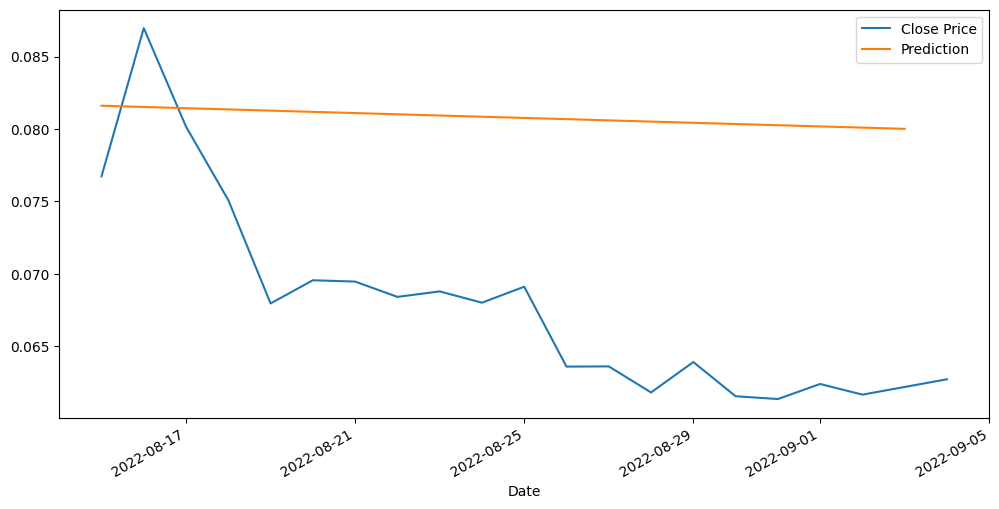

In [55]:
test["Close"].plot(label="Close Price",legend=True, figsize=(12, 6))
predictions.plot(label='Prediction', legend=True)


As shown above the prediction is very weak. In the following I fill exog parameter in SARIMAX and see the results.

In [58]:
model_2 = SARIMAX(endog=train["Close"],
                exog=train.drop(["Close", "Adj Close"], axis=1),
                order=(1,0,0),
                seasonal_order=(0,0,0,7))
results_2 = model_2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.16140D+00    |proj g|=  9.57159D+17

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   9.572D+17  -5.161D+00
  F =  -5.1614014635392511     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding erro

In [59]:
predictions_2 = results_2.predict(start=len(train),
                                  end=len(DOGE_Coin_Data) - 1,
                                  exog=test.drop(["Close", "Adj Close"], axis=1))

<Axes: xlabel='Date'>

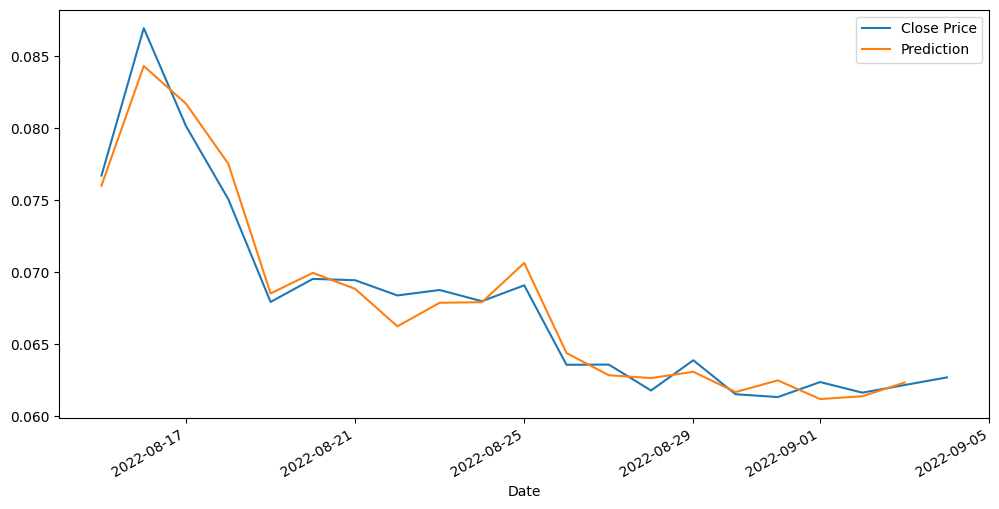

In [60]:
test["Close"].plot(label="Close Price",legend=True, figsize=(12, 6))
predictions_2.plot(label='Prediction', legend=True)

Pretty accurate!
As you see SARIMAX is perform perfect with exog parameter.

Side note: in the stock market we don't have future features and as we saw above the SARIMAX needs exog to performs well so SARIMAX won't work to predict DOGE-USD close price.